# Housing Price: Advanced Models

## CONTENTS:

[ **1 ) Importing the Modules and Loading the Dataset**](#content1)

[ **2 ) Exploratory Data Analysis (EDA)**](#content2)

[ **3 ) Missing Values Treatment**](#content3)

[ **4 ) Handling Skewness of Features**](#content4)

[ **5 ) Prepare the Data**](#content5)

[ **6 ) Regression Models**](#content6)

[ **7 ) Best Model**](#content7)

<a id="content1"></a>
## 1 ) Importing the Modules and Loading the Dataset

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from scipy import stats
from scipy.stats import norm, skew   # specifically for staistics

import xgboost as xgb
from xgboost import plot_importance

In [2]:
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')

<a id="content2"></a>
## 2 ) Data Preparation

In [3]:
df=train.copy()
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df.shape

(1460, 81)

In [5]:
df.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

#### MERGING THE TRAIN & TEST SETS

In [6]:
all_data=pd.concat([train,test])

In [7]:
print(all_data.shape)
all_data = all_data.reset_index(drop=True)

(2919, 81)


In [8]:
print(all_data.loc[1461:,'SalePrice'])  # note that it is Nan for the values in test set as expected. so we drop it here for now.
all_data.drop(['SalePrice'],axis=1,inplace=True)


1461   NaN
1462   NaN
1463   NaN
1464   NaN
1465   NaN
        ..
2914   NaN
2915   NaN
2916   NaN
2917   NaN
2918   NaN
Name: SalePrice, Length: 1458, dtype: float64


Most of them are in 'avergae','above avergae' or 'good' categories.

<a id="content3"></a>
## 3 ) Missing Values Treatment

In [9]:
#delete some features with very high number of missing values.  
all_data.drop(['PoolQC','Alley','Fence','Id','MiscFeature'],axis=1,inplace=True)


In [10]:
test.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)

In [11]:
# FireplaceQu
# it is useful but many of the values nearly half are missing makes no sense to fill half of the values. so deleting this
all_data.drop(['FireplaceQu'],axis=1,inplace=True)
test.drop(['FireplaceQu'],axis=1,inplace=True)
df.drop(['FireplaceQu'],axis=1,inplace=True)


#### Above analysis shows that there is some relation of lot with teh sale price both by scatter plot and also by the corelation value. therefore instead of deleting I will fill the values with the mean.

In [12]:
all_data['LotFrontage'].fillna(np.mean(all_data['LotFrontage']),inplace=True)
all_data['LotFrontage'].isna().sum()

0

In [13]:
#Garage  related features.
# these features eg like garage qual,cond,finish,type seems to be important and relevant for buying car. 
# hence I will not drop these features insted i will fill them with the 'none' for categorical and 0 for numeric as nan here implies that there is no garage.

all_data['GarageYrBlt'].fillna(0,inplace=True)
print(all_data['GarageYrBlt'].isnull().sum())

all_data['GarageArea'].fillna(0,inplace=True)
print(all_data['GarageArea'].isnull().sum())

all_data['GarageCars'].fillna(0,inplace=True)
print(all_data['GarageCars'].isnull().sum())

all_data['GarageQual'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageQual'].isnull().sum())

all_data['GarageFinish'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageFinish'].isnull().sum())

all_data['GarageCond'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageCond'].isnull().sum())

all_data['GarageType'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageType'].isnull().sum())

0
0
0
0
0
0
0


In [14]:
# basement related features.
#missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0,inplace=True)
    
# for categorical features we will create a separate class 'none' as before.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None',inplace=True)
    
print(all_data['TotalBsmtSF'].isnull().sum())

0


In [15]:
# MasVnrArea 0 and MasVnrType 'None'.
all_data['MasVnrArea'].fillna(0,inplace=True)
print(all_data['MasVnrArea'].isnull().sum())

all_data['MasVnrType'].fillna('None',inplace=True)
print(all_data['MasVnrType'].isnull().sum())

0
0


In [16]:
#MSZoning.
# Here nan does not mean no so I will with the most common one ie the mode.
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)
print(all_data['MSZoning'].isnull().sum())

0


In [17]:
#functional
# fill with mode
all_data['Functional'].fillna(all_data['Functional'].mode()[0],inplace=True)
print(all_data['Functional'].isnull().sum())

0


In [18]:
# other rem columns rae all cat like kitchen qual etc.. and so filled with mode.
for col in ['SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
  all_data[col].fillna(all_data[col].mode()[0],inplace=True)
  print(all_data[col].isnull().sum())

0
0
0
0
0


#### Lastly checking if any null value still remains.

In [19]:
nan_all_data = (all_data.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df

,Missing Ratio
Utilities,2


#### Finally no null value remain now;)

In [20]:
all_data.drop(['Utilities'],axis=1,inplace=True)
all_data.drop(['3SsnPorch'],axis=1,inplace=True)
all_data.drop(['BedroomAbvGr'],axis=1,inplace=True)
all_data.drop(['BldgType'],axis=1,inplace=True)
all_data.drop(['BsmtCond'],axis=1,inplace=True)
all_data.drop(['BsmtExposure'],axis=1,inplace=True)
all_data.drop(['BsmtFinSF2'],axis=1,inplace=True)
all_data.drop(['BsmtFinType1'],axis=1,inplace=True)
all_data.drop(['BsmtFinType2'],axis=1,inplace=True)
all_data.drop(['BsmtHalfBath'],axis=1,inplace=True)
all_data.drop(['Condition1'],axis=1,inplace=True)
all_data.drop(['Condition2'],axis=1,inplace=True)
all_data.drop(['Electrical'],axis=1,inplace=True)
all_data.drop(['EnclosedPorch'],axis=1,inplace=True)
all_data.drop(['ExterCond'],axis=1,inplace=True)
all_data.drop(['Exterior1st'],axis=1,inplace=True)
all_data.drop(['Exterior2nd'],axis=1,inplace=True)
all_data.drop(['ExterQual'],axis=1,inplace=True)
all_data.drop(['Foundation'],axis=1,inplace=True)
all_data.drop(['FullBath'],axis=1,inplace=True)
all_data.drop(['Functional'],axis=1,inplace=True)
all_data.drop(['GarageCond'],axis=1,inplace=True)
all_data.drop(['GarageFinish'],axis=1,inplace=True)
all_data.drop(['GarageQual'],axis=1,inplace=True)
all_data.drop(['GarageType'],axis=1,inplace=True)
all_data.drop(['HalfBath'],axis=1,inplace=True)
all_data.drop(['Heating'],axis=1,inplace=True)
all_data.drop(['HeatingQC'],axis=1,inplace=True)
all_data.drop(['HouseStyle'],axis=1,inplace=True)
all_data.drop(['KitchenQual'],axis=1,inplace=True)
all_data.drop(['LandContour'],axis=1,inplace=True)
all_data.drop(['LandSlope'],axis=1,inplace=True)
all_data.drop(['LotConfig'],axis=1,inplace=True)
all_data.drop(['LotShape'],axis=1,inplace=True)
all_data.drop(['LowQualFinSF'],axis=1,inplace=True)
all_data.drop(['MasVnrArea'],axis=1,inplace=True)
all_data.drop(['MasVnrType'],axis=1,inplace=True)
all_data.drop(['MiscVal'],axis=1,inplace=True)
all_data.drop(['MSSubClass'],axis=1,inplace=True)
all_data.drop(['PavedDrive'],axis=1,inplace=True)
all_data.drop(['PoolArea'],axis=1,inplace=True)
all_data.drop(['RoofMatl'],axis=1,inplace=True)
all_data.drop(['RoofStyle'],axis=1,inplace=True)
all_data.drop(['SaleType'],axis=1,inplace=True)
all_data.drop(['Street'],axis=1,inplace=True)
all_data.drop(['TotRmsAbvGrd'],axis=1,inplace=True)
all_data.drop(['YrSold'],axis=1,inplace=True)

<a id="content5"></a>
## 5 ) Prepare the Data

In [21]:
for col in all_data.columns:
    if(all_data[col].dtype == 'object'):
        le=LabelEncoder()
        all_data[col]=le.fit_transform(all_data[col])

## 6 ) Regression Models

In [22]:
train=all_data.loc[:(df.shape)[0]+2,:]
test=all_data.loc[(df.shape)[0]+2:,:]

In [23]:
train['SalePrice']=df['SalePrice']
train['SalePrice'].fillna(np.mean(train['SalePrice']),inplace=True)
train.shape
print(train['SalePrice'].isnull().sum())

0


In [24]:
print(train.shape)
print(test.shape)

(1463, 28)
(1457, 27)


In [25]:
resultR2=[]
resultRMSE=[]
resultModel=[]

#### LINEAR REGRESSION

In [26]:
for i in range(1,51):
    x_train,x_test,y_train,y_test=train_test_split(train.drop(['SalePrice'],axis=1),train['SalePrice'],test_size=0.20,random_state=i)
    reg_lin=LinearRegression()
    reg_lin.fit(x_train,y_train)
    pred=reg_lin.predict(x_test)
    resultR2.append(r2_score(y_test,pred))
    resultRMSE.append(np.sqrt(mean_squared_error(y_test,pred)))
    resultModel.append("RegLin")
print("R2 Medio: ", np.mean(resultR2))
print("RMSE Medio: ", np.mean(resultRMSE))

R2 Medio:  0.7985998016154181
RMSE Medio:  35053.62777103358


#### LASSO (and tuning with GridSearchCV)

In [27]:
for i in range(1,51):
    x_train,x_test,y_train,y_test=train_test_split(train.drop(['SalePrice'],axis=1),train['SalePrice'],test_size=0.20,random_state=i)
    params_dict={'alpha':[0.05,0.1,0.5,1]}
    reg_lasso_CV=GridSearchCV(estimator=Lasso(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
    reg_lasso_CV.fit(x_train,y_train)
    pred=reg_lasso_CV.predict(x_test)
    resultR2.append(r2_score(y_test,pred))
    resultRMSE.append(np.sqrt(mean_squared_error(y_test,pred)))
    resultModel.append("LASSO")
print("R2 Medio: ", np.mean(resultR2[50:99]))
print("RMSE Medio: ", np.mean(resultRMSE[50:99]))

R2 Medio:  0.8027095146530603
RMSE Medio:  34799.56163407379


In [28]:
reg_lasso_CV.best_estimator_

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

#### RIDGE (and tuning with GridSearchCV)

In [29]:
for i in range(1,51):
    x_train,x_test,y_train,y_test=train_test_split(train.drop(['SalePrice'],axis=1),train['SalePrice'],test_size=0.20,random_state=i)
    params_dict={'alpha':[0.05,0.1,0.5,1]}
    reg_ridge_CV=GridSearchCV(estimator=Ridge(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
    reg_ridge_CV.fit(x_train,y_train)
    pred=reg_ridge_CV.predict(x_test)
    resultR2.append(r2_score(y_test,pred))
    resultRMSE.append(np.sqrt(mean_squared_error(y_test,pred)))
    resultModel.append("RIDGE")
print("R2 Medio: ", np.mean(resultR2[100:149]))
print("RMSE Medio: ", np.mean(resultRMSE[100:149]))

R2 Medio:  0.802760825027447
RMSE Medio:  34794.49362270729


In [30]:
reg_ridge_CV.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

#### GRADIENT BOOSTING

In [31]:
for i in range(1,51):
    x_train,x_test,y_train,y_test=train_test_split(train.drop(['SalePrice'],axis=1),train['SalePrice'],test_size=0.20,random_state=i)
    reg_gb=GradientBoostingRegressor(n_estimators=1000,learning_rate=0.05,max_depth=3,min_samples_split=10,max_features='sqrt',subsample=0.75 ,loss='huber')
    reg_gb.fit(x_train,y_train)
    pred=reg_gb.predict(x_test)
    resultR2.append(r2_score(y_test,pred))
    resultRMSE.append(np.sqrt(mean_squared_error(y_test,pred)))
    resultModel.append("GradBoost")
print("R2 Medio: ", np.mean(resultR2[150:199]))
print("RMSE Medio: ", np.mean(resultRMSE[150:199]))

R2 Medio:  0.8840130135415385
RMSE Medio:  26712.78629601052


#### XGBoost

In [32]:
for i in range(1,51):
    x_train,x_test,y_train,y_test=train_test_split(train.drop(['SalePrice'],axis=1),train['SalePrice'],test_size=0.20,random_state=i)
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=2, n_estimators=1000,
                             subsample=0.6,
                             random_state =7, nthread = -1)
    model_xgb.fit(x_train,y_train)
    pred=model_xgb.predict(x_test)
    resultR2.append(r2_score(y_test,pred))
    resultRMSE.append(np.sqrt(mean_squared_error(y_test,pred)))
    resultModel.append("XGBoost")
print("R2 Medio: ", np.mean(resultR2[200:249]))
print("RMSE Medio: ", np.mean(resultRMSE[200:249]))

R2 Medio:  0.8864848081852255
RMSE Medio:  26482.86719413113


#### Podemos exportar las Estadísticas para comparar los modelos

In [33]:
test_id=[]
for i in range (1,251):
    test_id.append(i)
d={'Id':test_id,'Model':resultModel,'R2':resultR2,'RMSE':resultRMSE}
ans_df=pd.DataFrame(d)
ans_df.to_csv('../docs/Models.csv',index=False)

#### Comparación de Modelos por R2

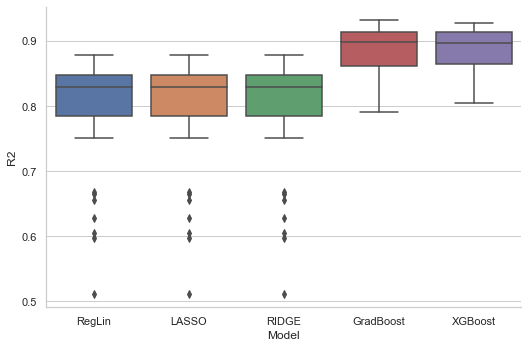

In [34]:
sns.factorplot(data=ans_df,x='Model',y='R2',kind='box',size=5,aspect=1.5)

#### Comparación de Modelos por RMSE

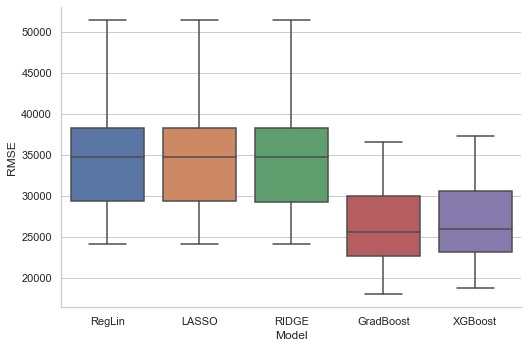

In [35]:
sns.factorplot(data=ans_df,x='Model',y='RMSE',kind='box',size=5,aspect=1.5)

## 7 ) Best Models

#### Revisamos el modelo que viene en el Notebook original

In [55]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, 
                             random_state =7)
model_xgb.fit(x_train,y_train)
pred=model_xgb.predict(x_test)
print("RSME: ",np.sqrt(mean_squared_error(y_test,pred)))
print("R2: ",r2_score(y_test,pred))

RSME:  27588.962374354454
R2:  0.8641097416048961


#### Modificamos los parámetros para ver cómo armamos el GridSearch

In [60]:
modelxgb=xgb.XGBRegressor(n_jobs=-1,learning_rate=.05,max_depth=3,colsample_bytree=1,verbosity=0,
                      subsample=1,n_estimators=1000,random_state=7)
modelxgb.fit(x_train,y_train)
predxgb=modelxgb.predict(x_test)
print("RSME: ",np.sqrt(mean_squared_error(y_test,predxgb)))
print("R2: ",r2_score(y_test,predxgb))

RSME:  25449.827197944607
R2:  0.8843655427265275


#### Fijamos las listas de parámetros y ejecutamos GridSearchCV para identificar los parámetros óptimos

In [67]:
parameters = {'nthread':[-1], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.05,0.03], #so called `eta` value
              'max_depth': [2,3],
              'min_child_weight': [2],
              'subsample': [0.9,1],
              'colsample_bytree': [0.9,1],
              'n_estimators': [500,1000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1234]}

In [68]:
clf = GridSearchCV(model_xgb, parameters, n_jobs=5, 
                   cv=5, 
                   scoring='neg_mean_squared_error',
                   verbose=2, refit=True)
clf.fit(x_train,y_train)
predxgb=clf.predict(x_test)
print("RSME: ",np.sqrt(mean_squared_error(y_test,predxgb)))
print("R2: ",r2_score(y_test,predxgb))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    6.8s
[Parallel(n_jobs=5)]: Done 160 out of 160 | elapsed:   37.0s finished


RSME:  26653.496022071686
R2:  0.8731688431178751


In [69]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0468, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=2, missing=-999, monotone_constraints='()',
             n_estimators=500, n_jobs=12, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=7, reg_alpha=0.464,
             reg_lambda=0.8571, scale_pos_weight=1, seed=1234, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### El Mejor XGBoost sería:

In [66]:
modelxgb=xgb.XGBRegressor(n_jobs=-1,learning_rate=.05,max_depth=3,colsample_bytree=1,verbosity=0,
                      subsample=0.9,n_estimators=500,random_state=7)
modelxgb.fit(x_train,y_train)
predxgb=modelxgb.predict(x_test)
print("RSME: ",np.sqrt(mean_squared_error(y_test,predxgb)))
print("R2: ",r2_score(y_test,predxgb))

RSME:  23955.96803197903
R2:  0.8975421966878669
